# BUDS Report 10.5: More of Group


### Table of Contents

1. More Group Questions

In [1]:
# run this cell

from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

## 1. More Group Questions

Once again, load the NBA table so that we can use it. We'll relabel it so that your analysis is easier.

In [2]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled('2015-2016 SALARY', 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


<div class="alert alert-warning">
    <b>PRACTICE:</b> Write code that evaluates to the lowest salary paid to an NBA player in the 2015-2016 season. Then, repeat the proces for the highest salary paid. 

Once you have found those, write code that prints the following statements. Instead of salaries of \$10,000 and \$100,000 be sure to use the true lowest and highest salaries of the NBA.

<ul>
    <li>The lowest salary paid is \$10000
    <li>The highest slary paid is \$100000
    </ul>
    </div>

In [ ]:
...

In [3]:
# SOLUTION
lowest = nba.sort('SALARY').column('SALARY').item(0)
highest = nba.sort('SALARY', descending=True).column('SALARY').item(0)

print("The lowest salary paid is $" + str(lowest * 1000000))
print("The highest salary paid is $" + str(highest * 1000000))

The lowest salary paid is $30888.0
The highest salary paid is $25000000.0


<div class="alert alert-warning">
    <b>PRACTICE:</b> Create a table that contains the percentage of total team compensation that each player receives. For example, a player who is paid \$50,000 in a team that pays a total of \$500,000 to its players will have a share of 10%.
    
In order to do this, you need to have a column in your <code>nba</code>table that denotes each player's team's total compensation.</div>

TEAM|SALARY sum
-|-
Atlanta Hawks|69.5731
...|...

Start by creating a table like the one above; call it `total_pay`. It should have one row per NBA team and a column for the total compensation each team pays. In the code cell afterwards, we'll join this information to our table.

In [ ]:
...

In [4]:
# SOLUTION
team_and_money = nba.select('TEAM', 'SALARY')
total_pay = team_and_money.group('TEAM', sum)
total_pay

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


Here, we'll join the previous information to the original table. Don't worry too much about how it works, but take a look at the table to see what happened.

In [5]:
nba_and_total = nba.join('TEAM', total_pay)
nba_and_total

TEAM,PLAYER,POSITION,SALARY,SALARY sum
Atlanta Hawks,Paul Millsap,PF,18.6717,69.5731
Atlanta Hawks,Al Horford,C,12,69.5731
Atlanta Hawks,Tiago Splitter,C,9.75625,69.5731
Atlanta Hawks,Jeff Teague,PG,8,69.5731
Atlanta Hawks,Kyle Korver,SG,5.74648,69.5731
Atlanta Hawks,Thabo Sefolosha,SF,4,69.5731
Atlanta Hawks,Mike Scott,PF,3.33333,69.5731
Atlanta Hawks,Kent Bazemore,SF,2,69.5731
Atlanta Hawks,Dennis Schroder,PG,1.7634,69.5731
Atlanta Hawks,Tim Hardaway Jr.,SG,1.30452,69.5731


From here, you should be able to create a table that has the shares of each player. Do so in however many code cells you would like.

In [ ]:
...

In [6]:
# SOLUTION
player_shares_arr = nba_and_total.column('SALARY') / nba_and_total.column('SALARY sum')
player_shares = nba_and_total.with_column('SHARE', player_shares_arr)
player_shares

TEAM,PLAYER,POSITION,SALARY,SALARY sum,SHARE
Atlanta Hawks,Paul Millsap,PF,18.6717,69.5731,0.268375
Atlanta Hawks,Al Horford,C,12,69.5731,0.17248
Atlanta Hawks,Tiago Splitter,C,9.75625,69.5731,0.14023
Atlanta Hawks,Jeff Teague,PG,8,69.5731,0.114987
Atlanta Hawks,Kyle Korver,SG,5.74648,69.5731,0.0825963
Atlanta Hawks,Thabo Sefolosha,SF,4,69.5731,0.0574935
Atlanta Hawks,Mike Scott,PF,3.33333,69.5731,0.0479112
Atlanta Hawks,Kent Bazemore,SF,2,69.5731,0.0287467
Atlanta Hawks,Dennis Schroder,PG,1.7634,69.5731,0.025346
Atlanta Hawks,Tim Hardaway Jr.,SG,1.30452,69.5731,0.0187503


<div class="alert alert-warning">
    <b>PRACTICE:</b> Use as many code cells as you would like to answer the following questions/prompts. 
    
<ul>
    <li>Find out which player takes up the largest share of his team's compensation. 
    <li>How many players take up more than 20% of their team's compensation?
    <li>Are there any teams in which multiple players take up 20% of the team compensation? 
    </ul>

Try to write your code such that it evaluates to the answer to the question exactly (eg. an integer, True/False).</div>

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [7]:
# SOLUTION
player_shares.sort('SHARE', descending=True).column('PLAYER').item(0)

'Joe Johnson'

In [8]:
# SOLUTION
player_shares.where('SHARE', are.above(0.2)).num_rows

28

In [9]:
# SOLUTION
team_high_share = player_shares.where('SHARE', are.above(0.2)).group('TEAM')
multiple_high_share = team_high_share.column('count') > 1
np.count_nonzero(multiple_high_share) >= 1

True

## More Exploration

In [10]:
player_shares.where('SHARE', are.above(0.2)).sort('SALARY')

TEAM,PLAYER,POSITION,SALARY,SALARY sum,SHARE
Philadelphia 76ers,Gerald Wallace,SF,10.1059,42.4813,0.237889
Phoenix Suns,Tyson Chandler,C,13,50.5208,0.25732
Phoenix Suns,Eric Bledsoe,PG,13.5,50.5208,0.267217
Detroit Pistons,Reggie Jackson,PG,13.913,42.2118,0.329601
Denver Nuggets,Danilo Gallinari,SF,14,62.4294,0.224253
Milwaukee Bucks,Khris Middleton,SG,14.7,52.2584,0.281295
Dallas Mavericks,Chandler Parsons,SF,15.3615,65.7626,0.23359
Utah Jazz,Gordon Hayward,SF,15.4096,52.6319,0.29278
Dallas Mavericks,David Lee,PF,15.4937,65.7626,0.2356
Los Angeles Lakers,Roy Hibbert,C,15.5922,68.6079,0.227265


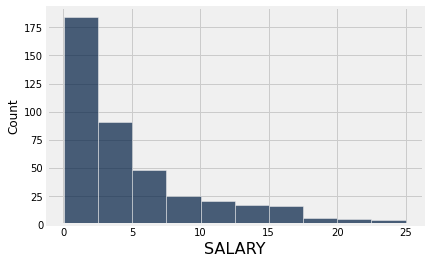

In [11]:
nba.hist('SALARY', normed=False)

In [12]:
high_share = player_shares.column('SHARE') > 0.10
player_high_shares = player_shares.with_column('HIGH SHARE (>0.10)', high_share)
player_high_shares

TEAM,PLAYER,POSITION,SALARY,SALARY sum,SHARE,HIGH SHARE (>0.10)
Atlanta Hawks,Paul Millsap,PF,18.6717,69.5731,0.268375,True
Atlanta Hawks,Al Horford,C,12,69.5731,0.17248,True
Atlanta Hawks,Tiago Splitter,C,9.75625,69.5731,0.14023,True
Atlanta Hawks,Jeff Teague,PG,8,69.5731,0.114987,True
Atlanta Hawks,Kyle Korver,SG,5.74648,69.5731,0.0825963,False
Atlanta Hawks,Thabo Sefolosha,SF,4,69.5731,0.0574935,False
Atlanta Hawks,Mike Scott,PF,3.33333,69.5731,0.0479112,False
Atlanta Hawks,Kent Bazemore,SF,2,69.5731,0.0287467,False
Atlanta Hawks,Dennis Schroder,PG,1.7634,69.5731,0.025346,False
Atlanta Hawks,Tim Hardaway Jr.,SG,1.30452,69.5731,0.0187503,False


/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


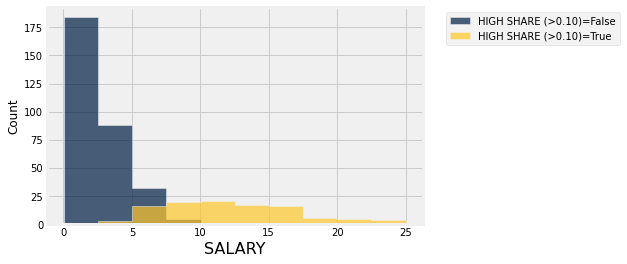

In [13]:
player_high_shares.hist('SALARY', group='HIGH SHARE (>0.10)', normed=False)

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


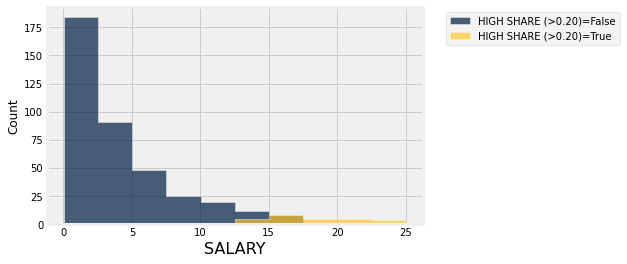

In [14]:
high_share = player_shares.column('SHARE') > 0.20
player_high_shares = player_shares.with_column('HIGH SHARE (>0.20)', high_share)
player_high_shares.hist('SALARY', group='HIGH SHARE (>0.20)', normed=False)

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


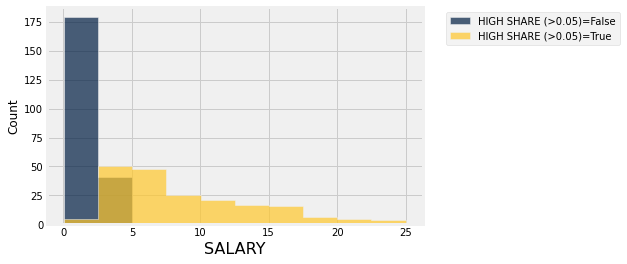

In [15]:
high_share = player_shares.column('SHARE') > 0.05
player_high_shares = player_shares.with_column('HIGH SHARE (>0.05)', high_share)
player_high_shares.hist('SALARY', group='HIGH SHARE (>0.05)', normed=False)

In [16]:
np.count_nonzero(high_share), len(high_share) - np.count_nonzero(high_share)

(197, 220)

In [17]:
pos_avg_share = player_high_shares.select('POSITION', 'SHARE').group('POSITION', np.average)
pos_avg_share.sort('SHARE average', descending=True) # compare this to report 10

POSITION,SHARE average
C,0.0852101
SF,0.0801563
PG,0.0734057
PF,0.0687111
SG,0.0569559


/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


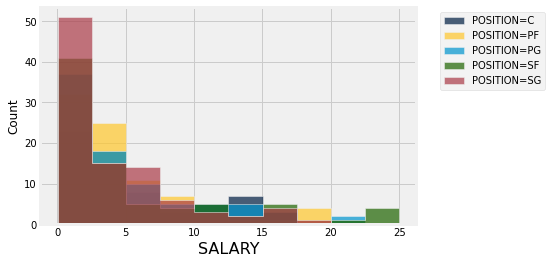

In [18]:
nba.hist('SALARY', group='POSITION', normed=False) # not a great vis

### Downloading as PDF

Download this notebook as a pdf by clicking <b><code>File > Download as > PDF via LaTeX</code></b>. Turn in the PDF into bCourses under the corresponding assignment.